# DIABETES 

<img src="/work/diabetes.jpg" alt="Diabetes">

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

**En particular, todos los pacientes aquí son mujeres de al menos 21 años de herencia indígena pima.**

**- Pregnancies:** Number of times pregnant **-(Numero de veces embarazada)**
**- Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test -**(Glucosa)**
**- BloodPressure:** Diastolic blood pressure (mm Hg) **-(Presion arterial)**
**- SkinThickness:** Triceps skin fold thickness (mm)**-(Grosor de  la piel(Triceps))**
**- Insulin:** 2-Hour serum insulin (mu U/ml) **-(Insulina)**
**- BMI:** Body mass index (weight in kg/(height in m)^2) **-(IMC(Indice de Masa Corporal))**
**- DiabetesPedigreeFunction:** Diabetes pedigree function **-(Una función que califica la probabilidad de diabetes según los antecedentes familiares)**
**- Age:** Age (years) **-(Edad)**
**- Outcome:** Class variable (0 or 1) **-(Resultado (Negativo o Positivo))**

## Análisis del DataSet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de Datos

In [ ]:
data = pd.read_csv('/work/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Tipos de datos

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Cantidad de datos

In [ ]:
print("Número original de datapoints: ", data.shape)

Número original de datapoints:  (768, 9)


### Datos Positivos y Negativos

In [ ]:
positive = data.apply(lambda x: x['Outcome'] ==1, axis=1).sum()
negative = data.apply(lambda x: x['Outcome'] ==0, axis=1).sum()
print('La cantidad de casos positivos son: ',positive)
print('La cantidad de casos negativos son: ',negative)

La cantidad de casos positivos son:  268
La cantidad de casos negativos son:  500


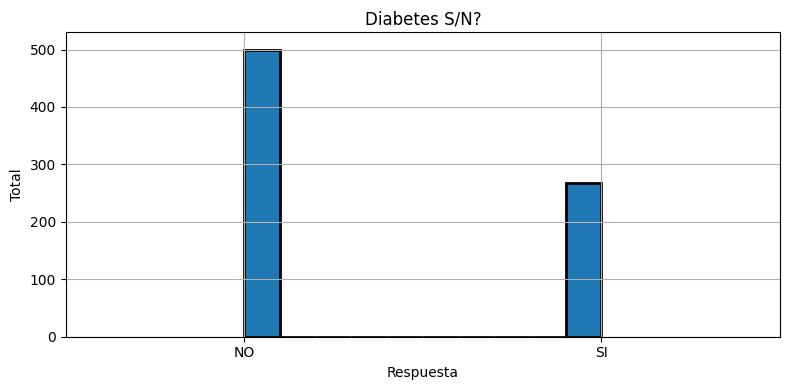

In [ ]:
a=plt.figure(figsize=(8,4))
ax= a.add_subplot(1,1,1)
data['Outcome'].hist(ax=ax, edgecolor='black',linewidth=2)
ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['NO','SI'])
ax.set_title('Diabetes S/N?')
ax.set_xlabel('Respuesta')
ax.set_ylabel('Total')
ax.set_ylim([0,530])
a.tight_layout()

### Rango de edad de las pacientes

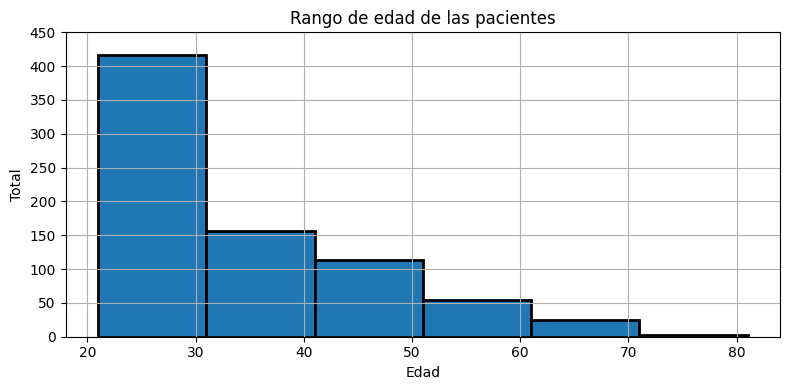

In [ ]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
data["Age"].hist(ax=ax,bins=6, edgecolor='black', linewidth=2)
ax.set_title("Rango de edad de las pacientes")
ax.set_ylim([0, 450])
ax.set_xlabel("Edad")
ax.set_ylabel("Total")
f.tight_layout()

### Relación Entre Presión Arterial vs. Rango de Edad

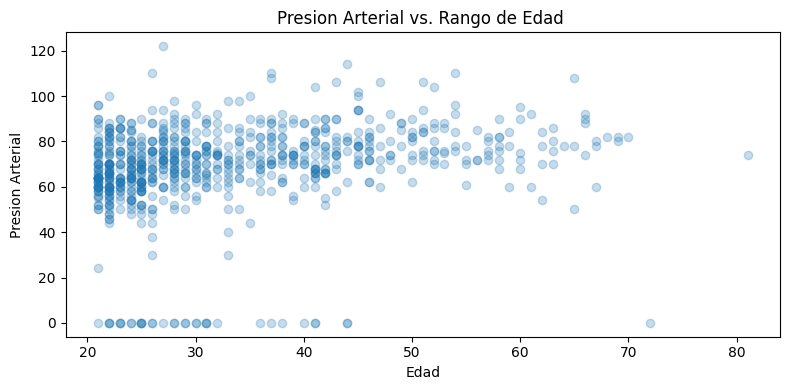

In [ ]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Presion Arterial vs. Rango de Edad ")
ax.set_ylabel("Presion Arterial")
ax.set_xlabel("Edad")
f.tight_layout() 

El diagrama de dispersión nos muestra como hay varias personas con 0 de presión arterial, algo que es poco posible. Por esto, vamos a remover estos datos.

In [ ]:
data = data[data["BloodPressure"] > 0]
print("Pacientes con presion arterial:", data.shape)

Pacientes con presion arterial: (733, 9)


Se borraron 35 pacientes que contenían 0 de presión arterial.

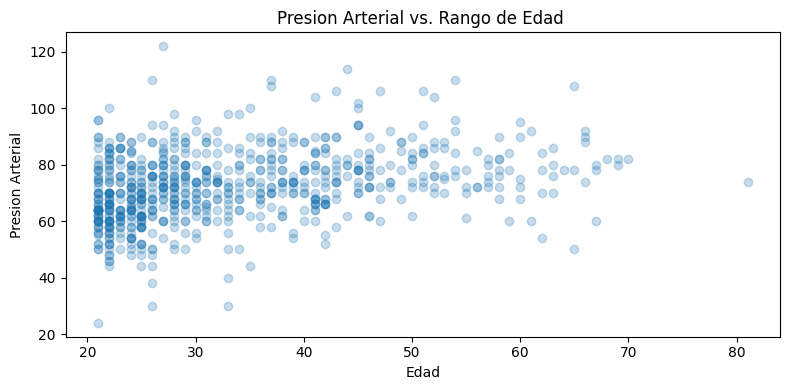

In [ ]:
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Presion Arterial vs. Rango de Edad ")
ax.set_ylabel("Presion Arterial")
ax.set_xlabel("Edad")
f.tight_layout()

Ahora podemos ver una tendencia mas clara:
- Pacientes grandes tiene más probabilidad de tener una presión arterial más alta
- Pacientes jovenes tienen mayor dispersión 

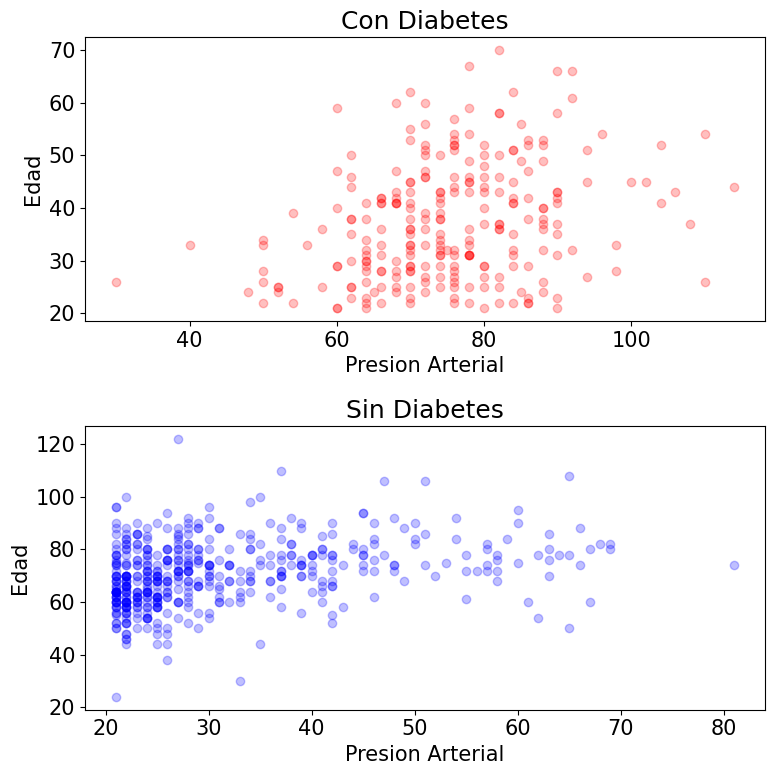

In [ ]:
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]
ax.set_title("Rango de edad vs Presion Arterial ")
plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,8))

ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["BloodPressure"], diabetic["Age"], alpha=0.25, c='r')
ax.set_title("Con Diabetes")
ax.set_ylabel("Edad")
ax.set_xlabel("Presion Arterial")

ax = f.add_subplot(2,1,2)
ax.scatter(notdiabetic["Age"], notdiabetic["BloodPressure"], alpha=0.25, c='b')
ax.set_title("Sin Diabetes")
ax.set_ylabel("Edad")
ax.set_xlabel("Presion Arterial")


f.tight_layout() 

Como se puede observar en los gráficos, las pacientes que tienen diabetes son propensas a tener la presión arterial mas alta.

### Correlación entre Datos

In [ ]:
df_diabetic_corr=data.iloc[:,:8].corr()
df_diabetic_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.137170,0.214178,-0.097440,-0.078620,0.019370,-0.030364,0.559414
Glucose,0.137170,1.000000,0.221436,0.055790,0.337635,0.198786,0.134976,0.260742
BloodPressure,0.214178,0.221436,1.000000,0.006357,-0.047375,0.258735,-0.002805,0.330107
SkinThickness,-0.097440,0.055790,0.006357,1.000000,0.417892,0.394566,0.175213,-0.135420
Insulin,-0.078620,0.337635,-0.047375,0.417892,1.000000,0.192517,0.181457,-0.050697
BMI,0.019370,0.198786,0.258735,0.394566,0.192517,1.000000,0.123151,0.006823
DiabetesPedigreeFunction,-0.030364,0.134976,-0.002805,0.175213,0.181457,0.123151,1.000000,0.019979
Age,0.559414,0.260742,0.330107,-0.135420,-0.050697,0.006823,0.019979,1.000000


<AxesSubplot:>

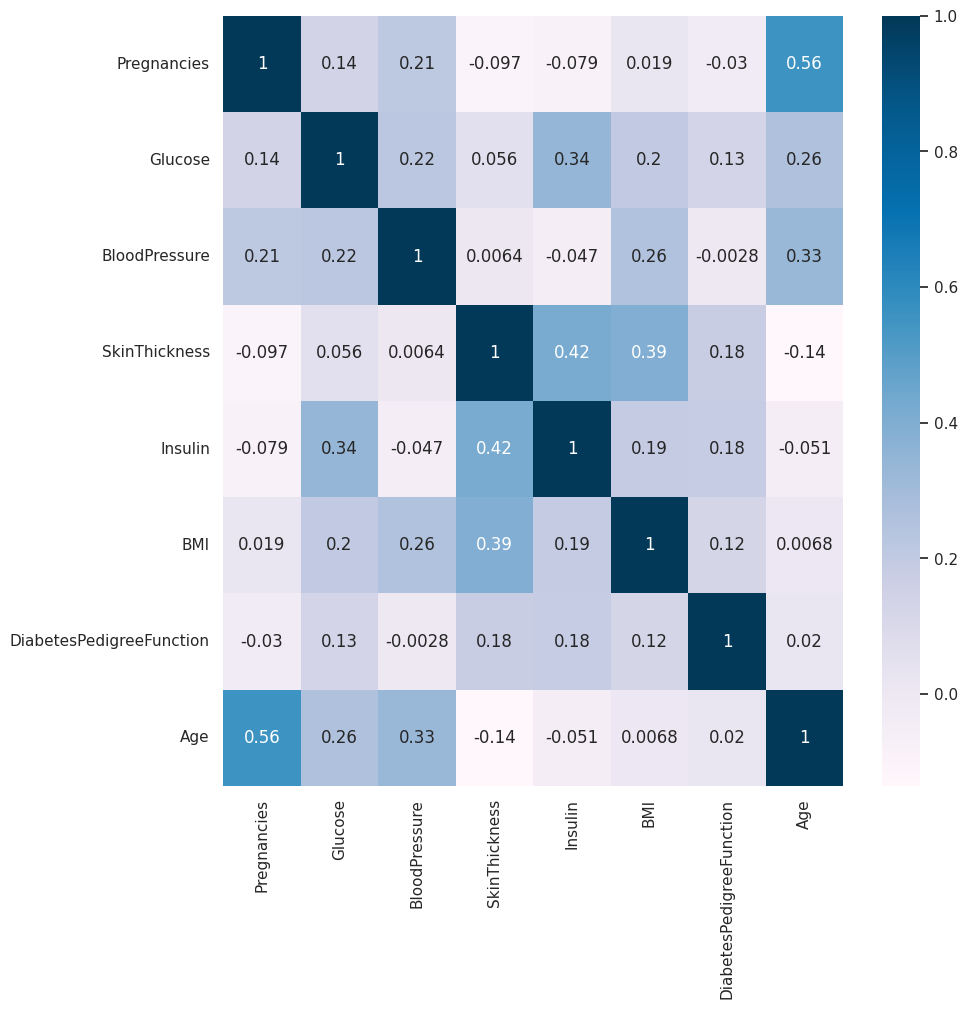

In [ ]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df_diabetic_corr,annot=True,cmap='PuBu')

Existe una correlación leve entre la cantidad de embarazadas con la edad, entre el resto de las variables es casi nula o no existe relación.

## Estudio del modelo

### Regresion Logistica

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
x = data[feature_cols]
y = data.Outcome

X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size= 0.20, random_state= 0)
model = LogisticRegression(max_iter = len(X_train))
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [ ]:
conf_matrix = metrics.confusion_matrix(Y_test, y_pred)
conf_matrix

array([[85, 11],
       [23, 28]])

Text(0.5, 357.55555555555554, 'Etiqueta de Prediccion')

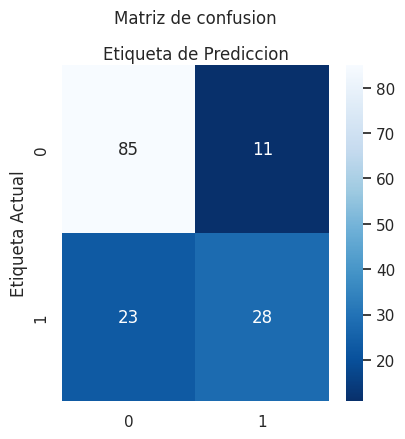

In [ ]:
class_names = [0,1]
fig,ax = plt.subplots(figsize=(4,4)) 
tick_marks = np.arange(len(class_names))  
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names) 

sns.heatmap(pd.DataFrame(conf_matrix), annot = True, cmap='Blues_r', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y=1.1)
plt.ylabel('Etiqueta Actual')
plt.xlabel('Etiqueta de Prediccion')

Esta matriz de confusión muestra que 85 datos fueron clasificados correctamente cuando fueron positivos, 28 datos fueron clasificados correctamente cuando fueron negativos, 11 datos clasificados incorrectamente como negativos y 23 fueron clasificados incorrectamente como positivos.

In [ ]:
print('Exactitud:',metrics.accuracy_score(Y_test,y_pred).round(4))

Exactitud: 0.7687


Este modelo tiene el 76,9% de probabilidad de saber si un paciente nuevo con estas características tiene diabetes o no.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d2b206d-0c92-461c-a0fe-b57eecde8ab2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>